# Avocado Project for determining the Average Price.

In [480]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

Importing the Libraies

In [481]:
df=pd.read_csv('Avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


Loading the Dataset into Dataframe and Printing the First five Rows

In [482]:
df.shape

(16468, 14)

In [483]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1517 non-null   float64
 1   Date          1517 non-null   object 
 2   AveragePrice  1517 non-null   float64
 3   Total Volume  1517 non-null   float64
 4   4046          1517 non-null   float64
 5   4225          1517 non-null   float64
 6   4770          1517 non-null   float64
 7   Total Bags    1517 non-null   float64
 8   Small Bags    1517 non-null   float64
 9   Large Bags    1517 non-null   float64
 10  XLarge Bags   1517 non-null   float64
 11  type          1517 non-null   object 
 12  year          1517 non-null   float64
 13  region        1517 non-null   object 
dtypes: float64(11), object(3)
memory usage: 1.8+ MB


In [484]:
df.isnull().sum()

Unnamed: 0      14951
Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

The Data have 14951 Missing Values

In [485]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,26.995386,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,14.848287,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.000000,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,14.000000,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,29.000000,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,39.000000,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,51.000000,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


<AxesSubplot:>

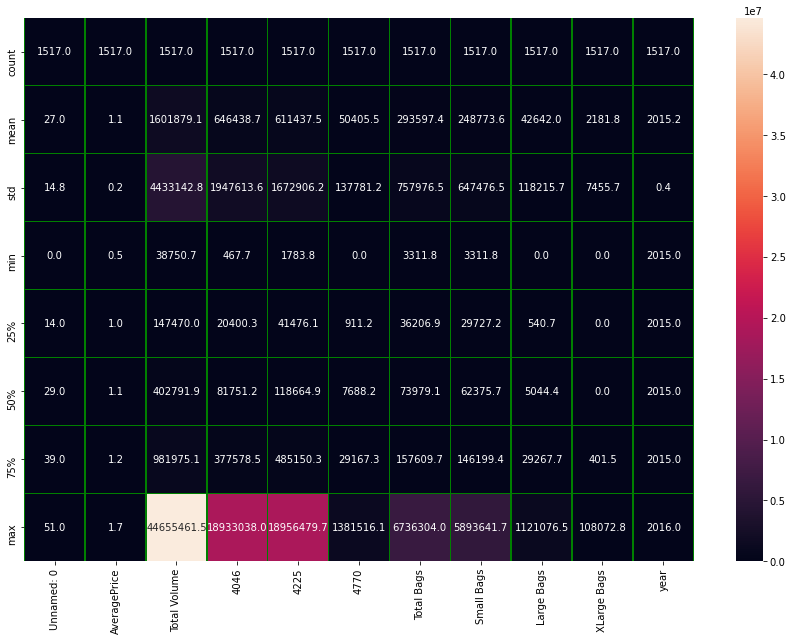

In [486]:
plt.figure(figsize=(15,10))
sns.heatmap(df.describe(),annot=True,linewidth=0.5,linecolor='green',fmt='0.1f')

Heat Map for Description of Dataset

4225            6.394926
Total Volume    6.200138
4046            6.051830
XLarge Bags     5.775077
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
year            1.828332
AveragePrice   -0.109444
Unnamed: 0     -0.234824
dtype: float64


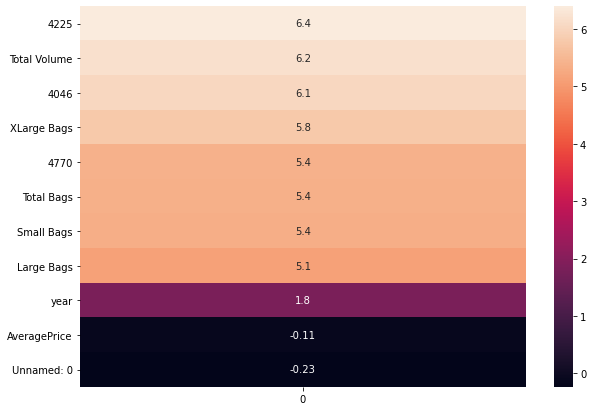

In [487]:
skew=df.skew().sort_values(ascending=False)
print(skew)
skew1=pd.DataFrame(skew)
plt.figure(figsize=(10,7))
sns.heatmap(skew1,annot=True)
plt.show()

In [488]:
This Skew heatmap shows that only AveragePrice and Unnamed: 0 are negatively skewed

SyntaxError: invalid syntax (<ipython-input-488-04cbdc28bba2>, line 1)

In [ ]:
zeros=(df==0).astype(bool).sum(axis=0)
print(zeros)
zeros1=pd.DataFrame(zeros)
sns.heatmap(zeros1)

This Heatmap shows Zero Values of Large Bags and XLarge Bags.

In [ ]:
df['AveragePrice'].plot.density()

Plot Density of Average Price Peaked at 1.

In [ ]:
plt.figure(figsize=(10,4))
df['year'].plot.density()
plt.show()

In [ ]:
plt.figure(figsize=(25,8))
plt.xticks(rotation=90)
sns.countplot(x='region',data=df,hue='year')
plt.show()

Count of Region as per year.

In [ ]:
plt.figure(figsize=(25,8))
sns.barplot(x=df['region'],y=df['AveragePrice'])
plt.xlabel('Region')
plt.xticks(rotation = 90)
plt.ylabel('AveragePrice')
plt.title('Average Price According to the Region', color = 'blue', fontsize = 20)
plt.show()

BAr Plot Showing Average Price According to the Region

In [ ]:
plt.figure(figsize=(25,8))
sns.barplot(x=df['region'],y=df['Total Volume'])
plt.xlabel('Region')
plt.xticks(rotation = 90)
plt.ylabel('Total Volume')
plt.title('Total Volume According to the Region', color = 'blue', fontsize = 20)
plt.show()

Bar Plot showing Total Volume According to the Region

In [ ]:
plt.figure(figsize=(25,8))
plt.xticks(rotation=90)
sns.scatterplot(x='region',y='AveragePrice',data=df,hue='year')
plt.show()

THis Scatter Plot Shows Average Price According to region as per Year.

In [ ]:
plt.figure(figsize=(25,8))
plt.xticks(rotation=90)
sns.scatterplot(x='Total Bags',y='Small Bags',data=df,hue='year',color='red')
plt.show()

This Plot shows a higly positive relation between Total Bags and Small Bags as per Year

In [ ]:
sns.pairplot(df)

Pair Plot Shwing Plot Between Columns

In [ ]:
cor=df.corr()['AveragePrice'].sort_values(ascending=True)
print(cor)
plt.figure(figsize=(10,7))
cor.plot(kind='bar')
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

THis Correlation Haetmap shows high positive relationship along the middle and negative relationship along the edges.

In [ ]:
df1=df.drop(labels=range(1517,16468),axis=0)

Here we drop the rows below 1516 as it had No values.

In [ ]:
df1.shape

New Rows of the DataFrame

In [ ]:
df1

In [ ]:
# For Date Type
df1['Date']=df1['Date'].replace('\n','')
df1['Date']=df1['Date'].replace('  0        0        ','')
df1['Date']=df1['Date'].replace('\n1        20-12-2...','')
df1['Date']=pd.to_datetime(df1['Date'])
df1['Date']

Here we covert the Date column from Object to Datetime format.

# Dropping Column 'type'

In [ ]:
df2=df1.drop('type',axis=1)
df2

'type' columns is dropped because it has only one values

# Label Encoding the Dataset.

In [ ]:
lenc=LabelEncoder()
df2['region']=lenc.fit_transform(df2['region'])
df2['Date']=lenc.fit_transform(df2['Date'])
df2.head() 

# Removing Outliers

In [ ]:
plt.figure(figsize=(20,8))
df2.boxplot()
plt.show()

Box Plot Showing high Outliers

In [ ]:
from scipy.stats import zscore
z=np.abs(zscore(df2))
df2.apply(zscore)
threshold=3
df3=df2[(z<3).all(axis=1)]
print(df.shape)
print(df1.shape)
print(df2.shape)
print(df3.shape)
df3.head()

Here using zscore to eliminate the outliers

In [ ]:
print((1517-1436)/1517*100)
df3.head()

Here we see only 5% of data has been lost

In [ ]:
x=df3.drop('AveragePrice',axis=1)
y1=df3['AveragePrice'].to_numpy()
y=pd.DataFrame(y1)
print(x.shape,y.shape)

Sorting the data into variable and Target for modeling

# Support Vector Regression

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)
print(x.shape)
print(y.shape)

We apply the feature Scaling of the x and y before applying in SVR Model.

In [ ]:
from sklearn.svm import SVR
kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    print(sv.fit(x_train,y_train))
    print(sv.score(x_train,y_train))

Hypertuning the Model to find the best fit. Here we see that SVR(rbf) has high sv score.

In [ ]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(x,y)
y_pred = svr.predict(x)
y_pred

Finding the SVR Targets

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y,y=y_pred,color='r')
plt.plot(y,y,color='b')
plt.xlabel('Actual Charges',fontsize=14)
plt.ylabel('Predicted Charges',fontsize=14)
plt.title('Support Vector Regression',fontsize=18)
plt.show()

Plotting the Actual Vs Predicted Data to see the results, we see that Actual Vs Predicted is clustered.

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [ ]:
lr=LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f'At random state {i},the training accuracy is :- {r2_score(y_train,pred_train)}')
    print(f'At random state {i}, the testing accuarcy is :- {r2_score(y_test,pred_test)}')
    print('\n')

Fitting SVR to the dataset. Predicting a new result

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Charges',fontsize=14)
plt.ylabel('Predicted Charges',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

Plotting the Actual Vs Predicted Data to see the results we see that it is far from the actual data, Hence this model is not suitable.

# Cross Validation Score

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At Cross fold {j} the cv score is {cv_mean}, accuracy score of training is {train_accuracy} and accuracy score of testing is {test_accuracy}')
    print('\n')

In [ ]:
Here Cross validating the result we can see that Accuracy score is low.

# Regularisation

In [ ]:
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)


In [ ]:
ls=Lasso(alpha=0.01,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
lss=r2_score(y_test,pred_ls)
lss

In [ ]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

In [ ]:
Here we see that Lasso Model have very low score . Hence it is not suitable.

# Ensemble Technique

In [ ]:
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

In [ ]:
rf=RandomForestRegressor(criterion='mse',max_features='log2')
rf.fit(x_train,y_train)
pred_decision=rf.predict(x_test)

rfs=r2_score(y_test,pred_decision)
print('r2 Score',rfs*100)

rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

In [ ]:
In this we find the parameters using gridsearch and applying to Random Forest Regressor we found r2 acore of 85%

# Conclusion

From the above Model we can see that Random Forest Regressor has the highest Score hence we use Random Forest Regressor Model

# Saving Model

In [ ]:
import pickle
filename='rfcmodel.pkl'
pickle.dump(rfc, open(filename,'wb'))